In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
%matplotlib inline

In [48]:
#load the data
data = pd.read_csv('data/framingham.csv')
data.drop(['education'],axis=1,inplace=True)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [49]:
#total percentage of missing data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 12.74%


In [50]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


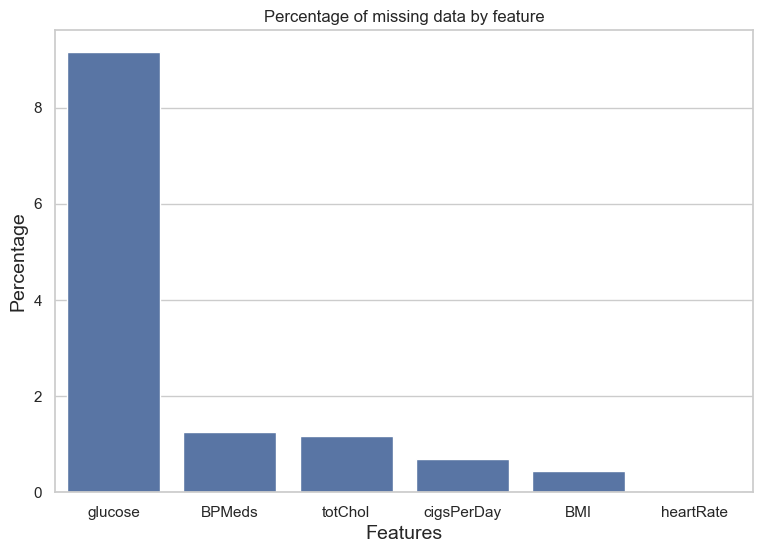

In [51]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [52]:
data.dropna(axis=0, inplace=True)
data.shape
data.head

<bound method NDFrame.head of       male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4233     1   50              1         1.0     0.0                0   
4234     1   51              1        43.0     0.0                0   
4237     0   52              0         0.0     0.0                0   
4238     1   40              0         0.0     0.0                0   
4239     0   39              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  106.0

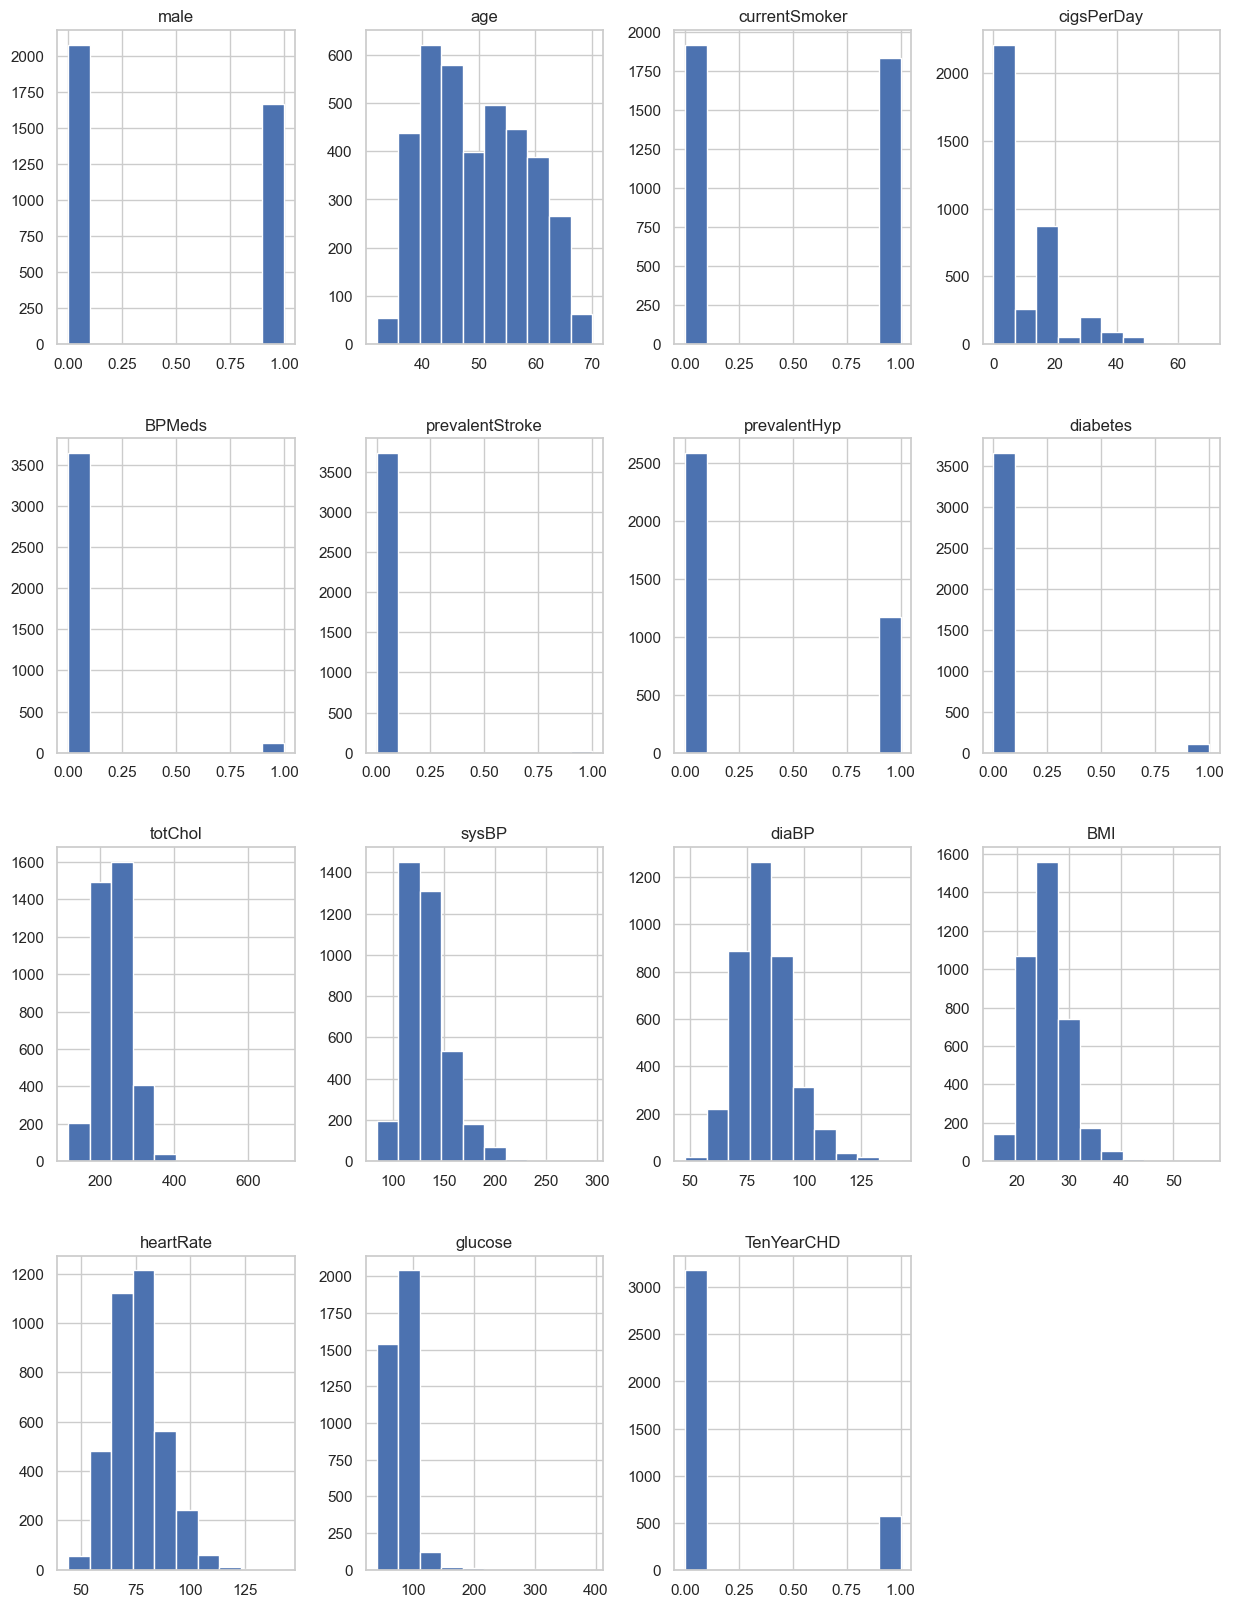

In [53]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

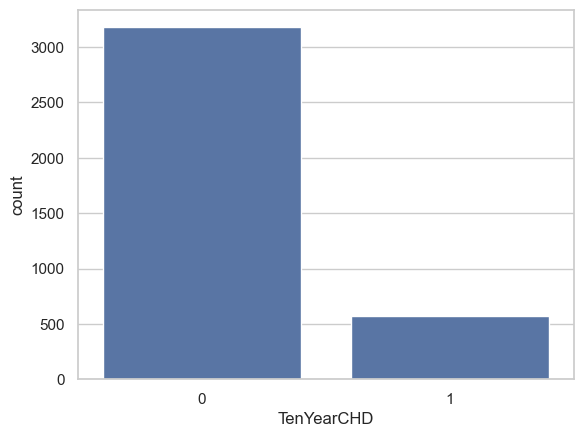

There are 3179 patients without heart disease and 572 patients with the disease


In [54]:
sns.countplot(x='TenYearCHD',data=data)
plt.show()
cases = data.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

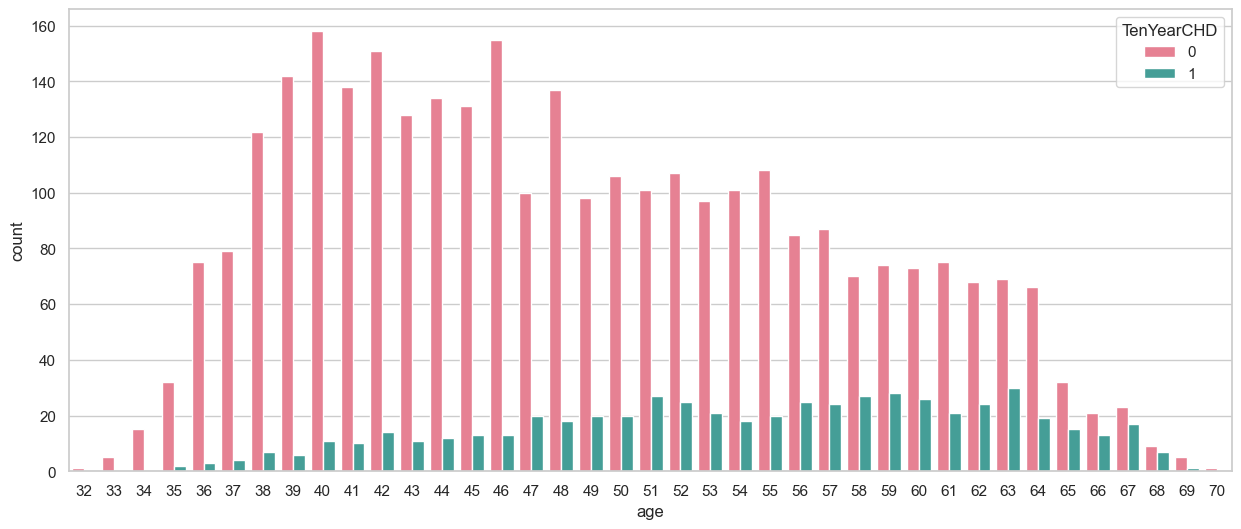

In [55]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = data, hue = 'TenYearCHD',palette='husl')
plt.show()

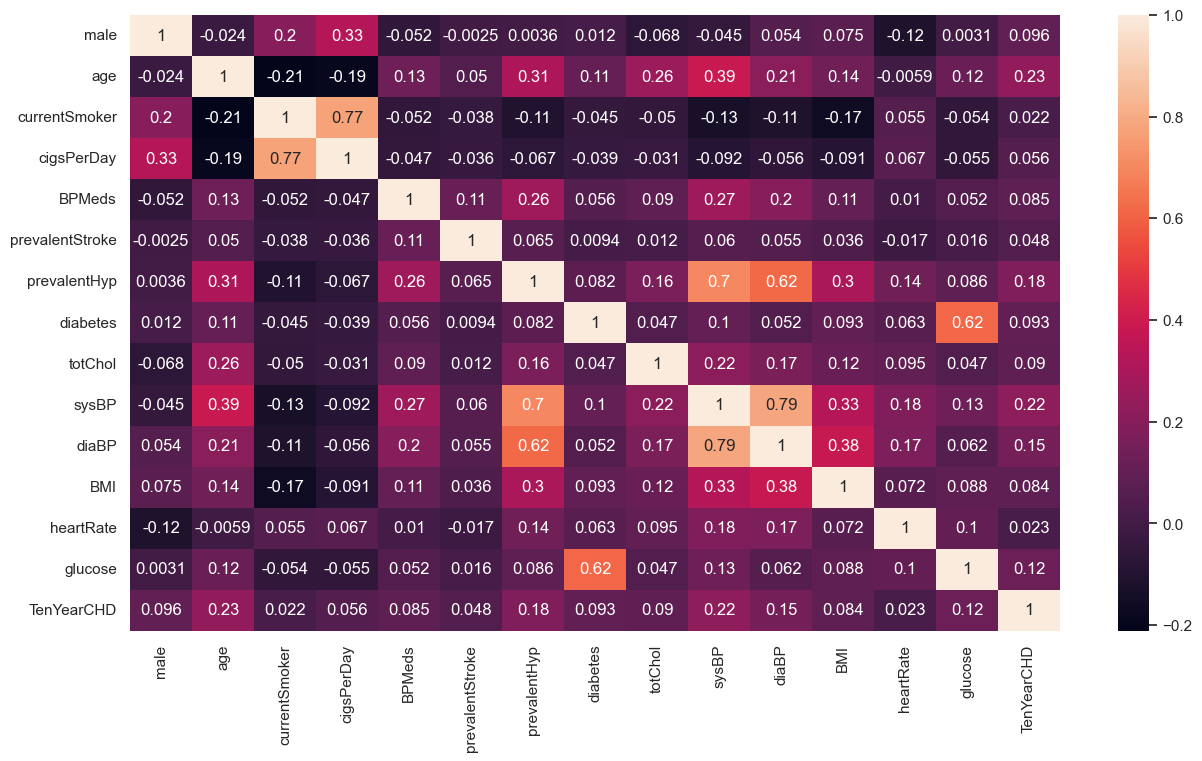

In [56]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [57]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
#define the features
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(x, y)
# show the most important features
most_important = data.columns[:-1][feat_selector.support_].tolist()
most_important

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration:

['age', 'sysBP', 'BMI']

In [58]:
# select the top features
top_features = data.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [59]:
import statsmodels.api as sm
X_top = data[top_features]
y = data['TenYearCHD']
res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.414453
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3743
Method:                           MLE   Df Model:                            7
Date:                Fri, 27 Dec 2024   Pseudo R-squ.:                 0.02940
Time:                        14:50:02   Log-Likelihood:                -1554.6
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 1.701e-17
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0248      0.006      4.404      0.000       0.014       0.036
cigsPerDay     0.0165      0.004      4.411      0.000       0.009       0.024
totChol       -0.0031      0.001     -2.882      0.004      -0.005      -0.001
sysBP          0.0256      0.003      7.696      0.000       0.019       0.032
diaBP         -0.0290      0.006     -4.911      0.000      -0.041      -0.017
BMI           -0.0495      0.012     -4.124      0.000      -0.073      -0.026
heartRate     -0.0329      0.004     -8.640      0.000      -0.040      -0.025
glucose        0.0044      0.002      2.685      0.007       0.001       0.008
==============================================================================
"""

In [60]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                  5%       95%  Odds Ratio
age         1.013859  1.036493    1.025114
cigsPerDay  1.009237  1.024188    1.016685
totChol     0.994760  0.999000    0.996878
sysBP       1.019284  1.032676    1.025958
diaBP       0.960190  0.982702    0.971381
BMI         0.929522  0.974338    0.951666
heartRate   0.960469  0.974902    0.967659
glucose     1.001189  1.007640    1.004409


In [61]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
X = data[top_features]
y = data.iloc[:,-1]

In [62]:
# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after smote
num_after =dict(Counter(y_smote))
print(num_after[0], num_after[1])

3178 2543


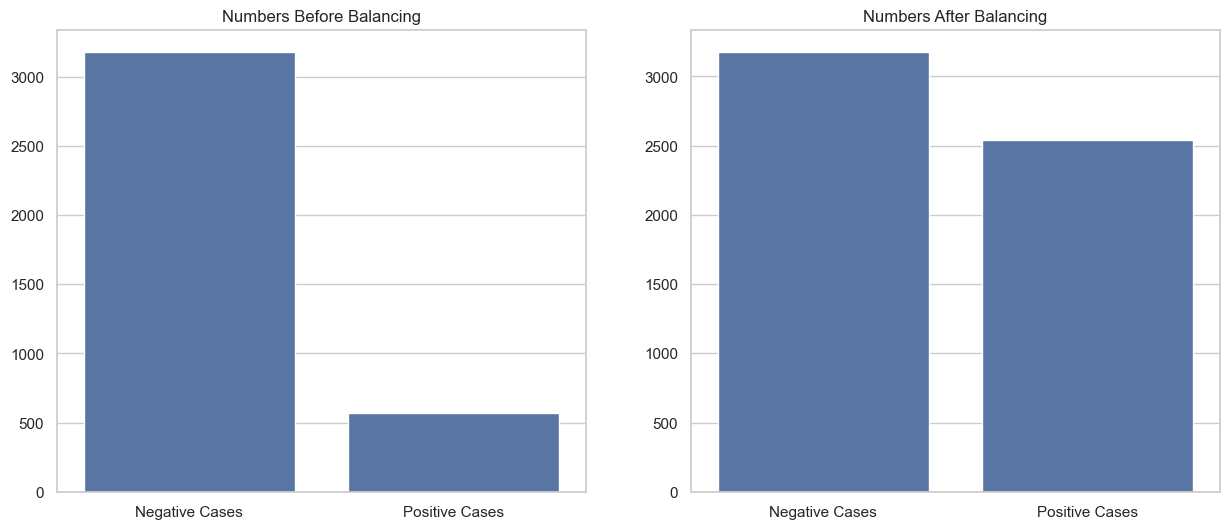

In [63]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [64]:
# Check shapes of X_smote and y_smote
print("X_smote shape:", X_smote.shape)
print("y_smote shape:", y_smote.shape)

# Combine data
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)

# Ensure correct number of columns
print("New data shape:", new_data.shape)

# Assign column names
if new_data.shape[1] == 8:  # If total columns are 8
    new_data.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
elif new_data.shape[1] == 9:  # If total columns are 9
    print("Warning: Found an extra column. Please inspect the dataset.")
    # Adjust columns appropriately
    # new_data.columns = [...] (fix labels based on your data structure)
else:
    raise ValueError("Unexpected number of columns in the dataset!")

# Display the first few rows
new_data.head()


X_smote shape: (5721, 8)
y_smote shape: (5721,)
New data shape: (5721, 9)


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3659,42,0.0,238.0,118.0,80.0,33.19,75.0,76.0,0
643,39,20.0,240.0,120.0,80.0,24.79,81.0,75.0,0
160,55,4.0,308.0,124.0,76.0,27.23,75.0,68.0,0
3228,51,0.0,190.0,153.0,102.5,39.22,100.0,69.0,0
2764,47,0.0,221.0,140.0,94.0,28.84,80.0,85.0,0


In [65]:
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
3659,42,0.0,238.0,118.0,80.0,33.19,75.0,76.0
643,39,20.0,240.0,120.0,80.0,24.79,81.0,75.0
160,55,4.0,308.0,124.0,76.0,27.23,75.0,68.0
3228,51,0.0,190.0,153.0,102.5,39.22,100.0,69.0
2764,47,0.0,221.0,140.0,94.0,28.84,80.0,85.0


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_ 

{'n_neighbors': np.int64(1)}

In [69]:
# predictions
knn_predict = knn_clf.predict(X_test)
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 83.58%


<Axes: >

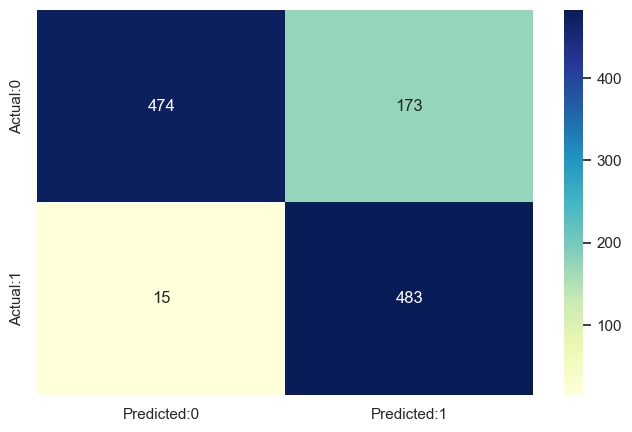

In [70]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [71]:
# age	totChol	sysBP	diaBP	BMI	heartRate	glucose
h = [[0, 39, 195, 106 ,70 , 26.97, 80, 77]]
prediction = knn_clf.predict(h)
print('You are safe. 😊 ') if prediction[0] == 0 else print('Sorry, You are on risk. 👽')

Sorry, You are on risk. 👽


In [72]:
h = [[0, 65, 150, 180, 70, 26.97, 80, 77]]
prediction = knn_clf.predict(h)
print('You are safe. 😊 ') if prediction[0] == 0 else print('Sorry, You are on risk. 👽')

Sorry, You are on risk. 👽
